   user_count  login_user_count
0         119                14
1         836                74
2          12                 9
3         175                18


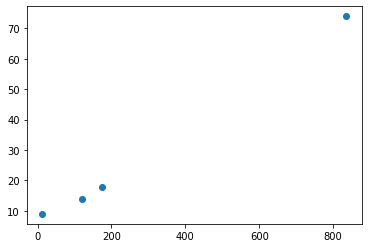

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from database.mysql_manager import MysqlManager

mysql = MysqlManager()
mysql.start_server()
conn = mysql.db_connect()
curs = conn.cursor()
sql = """
SELECT user_count, login_user_count
FROM (
	SELECT site_id, MAX(login_count) login_user_count FROM pass_monthly_login_user_counts GROUP BY site_id
) login_user_counts
JOIN (
	SELECT site_id, count(*) user_count FROM pass_users GROUP BY site_id
) user_counts
ON login_user_counts.site_id = user_counts.site_id
"""

df = pd.read_sql(sql,con = conn)

curs.close
conn.close
mysql.close_server()

print(df)

plt.scatter(df['user_count'], df['login_user_count'])